# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN32"
COLLABORATORS = "Batko Franciszek, Hałys Filip, Staroń Bartosz"

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def point_count_on_subregions(points, bins, x_lim, y_lim):
    wynik_t = np.histogram2d(points["X"], points["Y"], bins = bins, range = [x_lim, y_lim])
    wynik_l = list(wynik_t)
    wynik =wynik_l[0].flatten()
    return wynik

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    dx=(x_lim[1]-x_lim[0])/grid[1]
    dy=(y_lim[1]-y_lim[0])/grid[0]
    os_x=np.linspace(x_lim[0]+0.5*dx, x_lim[1]-0.5*dx, grid[1])
    os_y=np.linspace(y_lim[0]+0.5*dy, y_lim[1]-0.5*dy, grid[0])
    randx=np.random.uniform(-0.5*dx, 0.5*dx, grid[0]*grid[1])
    randy=np.random.uniform(-0.5*dy, 0.5*dy, grid[0]*grid[1])
    xx, yy=np.meshgrid(os_x, os_y, indexing="ij")
    xx_flatten=xx.flatten()
    yy_flatten=yy.flatten()
    rx=randx*random_component
    ry=randy*random_component
    xx_2=xx_flatten+rx
    yy_2=yy_flatten+ry
    XY={"X":xx_2, "Y":yy_2}
    points=pd.DataFrame(data=XY)
    return(points)

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    pole=(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    lambda0=intensity*pole
    n=np.random.poisson(lambda0, 1)
    x=np.random.uniform(x_lim[0], x_lim[1], n)
    y=np.random.uniform(y_lim[0], y_lim[1], n)
    XY={"X":x, "Y":y}
    points=pd.DataFrame(data=XY)
    return(points)

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    x_lim2=[0, 0]
    y_lim2=[0, 0]
    x_lim2[0]=x_lim[0]-cluster_radius
    x_lim2[1]=x_lim[1]+cluster_radius
    y_lim2[0]=y_lim[0]-cluster_radius
    y_lim2[1]=y_lim[1]+cluster_radius
    parent_poisson=homogeneous_poisson_on_rectangle(parent_intensity, x_lim2, y_lim2)
    punkty_parent=len(parent_poisson.index)
    points_X=parent_poisson["X"].to_numpy()
    points_Y=parent_poisson["Y"].to_numpy()
    koncowe_x=np.array([])
    koncowe_y=np.array([])
    for i in range(punkty_parent):
        a=points_X[i]
        b=points_Y[i]
        daughter_poisson=homogeneous_poisson_on_rectangle(daughter_intensity, [a-cluster_radius, a+cluster_radius], [b-cluster_radius, b+cluster_radius])
        points_X_daughter=daughter_poisson["X"].to_numpy()
        points_Y_daughter=daughter_poisson["Y"].to_numpy()
        XY_daughter={"X":points_X_daughter, "Y":points_Y_daughter}
        points_daughter=pd.DataFrame(data=XY_daughter)
        zakres_daughter=len(points_daughter.index)
        for j in range(zakres_daughter):
            if (points_daughter["X"][j]-a)**2+(points_daughter["Y"][j]-b)**2>cluster_radius**2:
                points_daughter=points_daughter.drop(j)
        daughter_array_X=points_daughter["X"].to_numpy()
        daughter_array_Y=points_daughter["Y"].to_numpy()
        koncowe_x=np.append(koncowe_x, daughter_array_X)
        koncowe_y=np.append(koncowe_y, daughter_array_Y)
    XY={"X":koncowe_x, "Y":koncowe_y}
    points=pd.DataFrame(data=XY)
    zakres=len(points.index)
    for i in range(zakres):
        if points["X"][i]<x_lim[0] or points["X"][i]>x_lim[1] or points["Y"][i]<y_lim[0] or points["Y"][i]>y_lim[1]:
            points=points.drop(i)
    return(points)
#raise NotImplementedError()

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [5]:
# YOUR CODE HERE
rozklad_r=regular_on_rectangle([15, 15], 0.75, [0, 10], [0, 10])
rozklad_p=homogeneous_poisson_on_rectangle(2.5, [0, 10], [0, 10])
rozklad_m=materna_on_rectangle(0.3, 5, 0.75, [0, 10], [0, 10])
#raise NotImplementedError()

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [6]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    punkty_x=points["X"].to_numpy()
    punkty_y=points["Y"].to_numpy()
    zakres=len(punkty_x)
    znalezione_min=np.max(punkty_x)+np.max(punkty_y)
    D=np.array([0, ])
    for i in range(zakres):
        for j in range(zakres):
            if j!=i:
                iks=punkty_x[i]-punkty_x[j]
                igrek=punkty_y[i]-punkty_y[j]
                szukane_min=np.sqrt((iks**2)+(igrek**2))
                if szukane_min<znalezione_min:
                    znalezione_min=szukane_min
        D=np.append(D, znalezione_min)
        znalezione_min=np.max(punkty_x)+np.max(punkty_y)
    D=np.sort(D)
    GD=np.array([])
    zakres_d=len(D)
    nd=0
    for i in range (zakres_d):
        for j in range (zakres_d):
            if D[j]<=D[i]:
                nd+=1
        nd=nd/zakres_d
        GD=np.append(GD, nd)
        nd=0
    XY={"D":D, "GD":GD}
    g=pd.DataFrame(data=XY)
    return(g)
    #raise NotImplementedError()
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    zakres=len(d)
    GD=np.array([])
    for i in range(zakres):
        gd=1-np.exp(-intensity*np.pi*(d[i]**2))
        GD=np.append(GD, gd)
    XY={"D":d, "GD":GD}
    g=pd.DataFrame(data=XY)
    return(g)
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
g_r=g_function(rozklad_r)
gp_r=g_function_poisson(g_r["D"], 2.5)
g_p=g_function(rozklad_p)
gp_p=g_function_poisson(g_p["D"], 2.5)
g_m=g_function(rozklad_m)
gp_m=g_function_poisson(g_m["D"], 2.5)
#raise NotImplementedError()

#### c) Wizualizacja

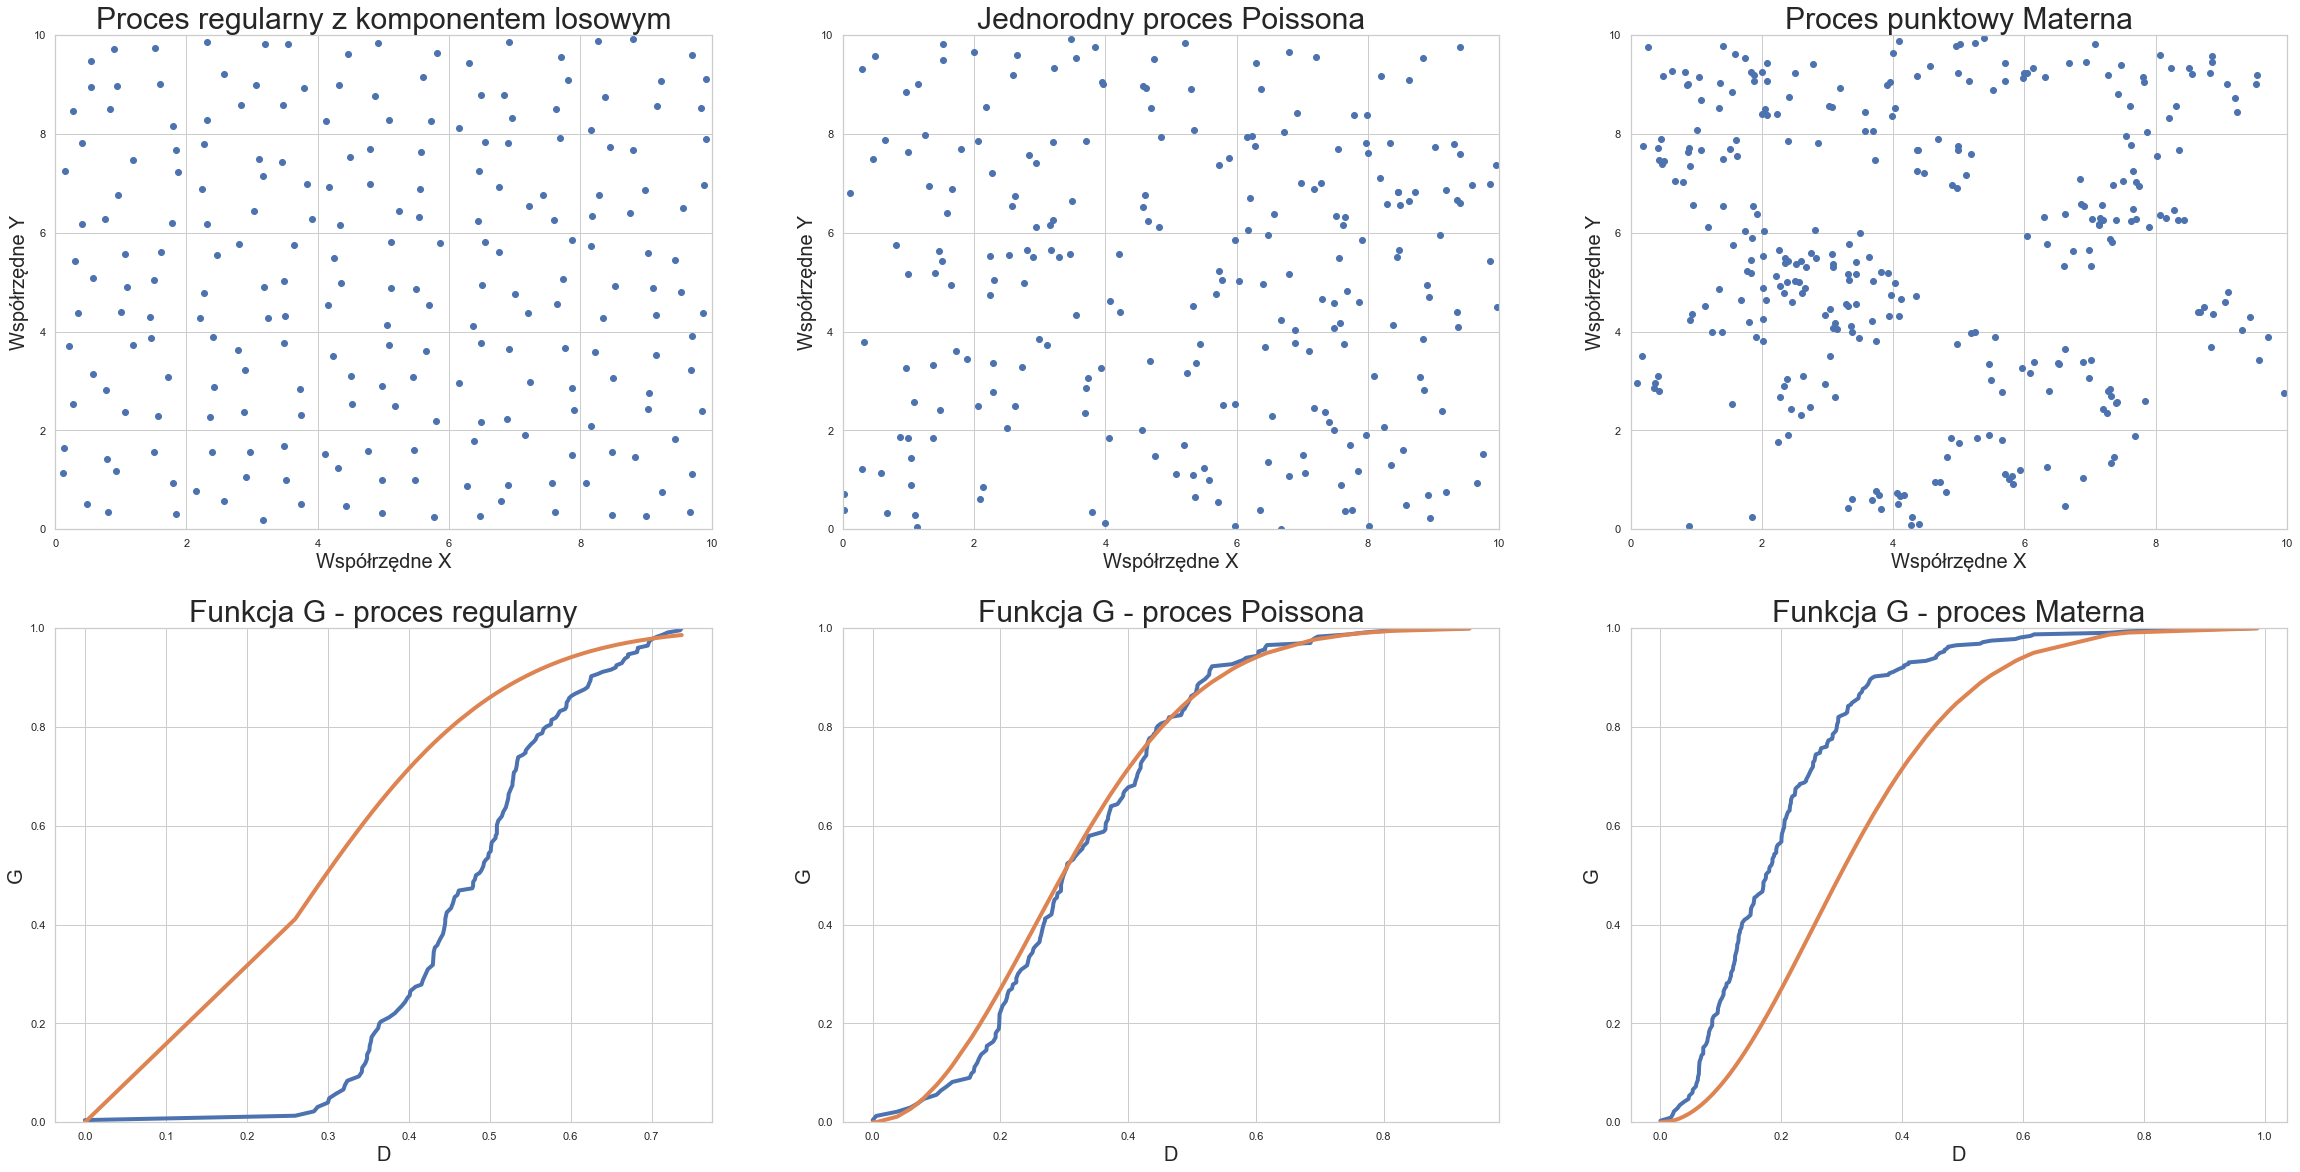

In [8]:
# YOUR CODE HERE
fig, axs=plt.subplots(2, 3, figsize=(40,20))
axs[0,0].scatter(x=rozklad_r["X"], y=rozklad_r["Y"])
axs[0,0].set_title("Proces regularny z komponentem losowym", fontsize=30)
axs[0,0].set_xlabel("Współrzędne X", fontsize=20)
axs[0,0].set_ylabel("Współrzędne Y", fontsize=20)
axs[0,0].set_xlim([0,10])
axs[0,0].set_ylim([0,10])
axs[0,1].scatter(x=rozklad_p["X"], y=rozklad_p["Y"])
axs[0,1].set_title("Jednorodny proces Poissona", fontsize=30)
axs[0,1].set_xlabel("Współrzędne X", fontsize=20)
axs[0,1].set_ylabel("Współrzędne Y", fontsize=20)
axs[0,1].set_xlim([0,10])
axs[0,1].set_ylim([0,10])
axs[0,2].scatter(x=rozklad_m["X"], y=rozklad_m["Y"])
axs[0,2].set_title("Proces punktowy Materna", fontsize=30)
axs[0,2].set_xlabel("Współrzędne X", fontsize=20)
axs[0,2].set_ylabel("Współrzędne Y", fontsize=20)
axs[0,2].set_xlim([0,10])
axs[0,2].set_ylim([0,10])
axs[1,0].plot(g_r["D"], g_r["GD"], linewidth=4)
axs[1,0].plot(gp_r["D"], gp_r["GD"], linewidth=4)
axs[1,0].set_title("Funkcja G - proces regularny", fontsize=30)
axs[1,0].set_xlabel("D", fontsize=20)
axs[1,0].set_ylabel("G", fontsize=20)
axs[1,0].set_ylim([0,1])
axs[1,1].plot(g_p["D"], g_p["GD"], linewidth=4)
axs[1,1].plot(gp_p["D"], gp_p["GD"], linewidth=4)
axs[1,1].set_title("Funkcja G - proces Poissona", fontsize=30)
axs[1,1].set_xlabel("D", fontsize=20)
axs[1,1].set_ylabel("G", fontsize=20)
axs[1,1].set_ylim([0,1])
axs[1,2].plot(g_m["D"], g_m["GD"], linewidth=4)
axs[1,2].plot(gp_m["D"], gp_m["GD"], linewidth=4)
axs[1,2].set_title("Funkcja G - proces Materna", fontsize=30)
axs[1,2].set_xlabel("D", fontsize=20)
axs[1,2].set_ylabel("G", fontsize=20)
axs[1,2].set_ylim([0,1])
plt.show()
#raise NotImplementedError()

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [9]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    punkty_x_a=points["X"].to_numpy()
    punkty_y_a=points["Y"].to_numpy()
    punkty_x_t=test_points["X"].to_numpy()
    punkty_y_t=test_points["Y"].to_numpy()
    zakres_a=len(punkty_x_a)
    zakres_t=len(punkty_x_t)
    znalezione_min=np.max(punkty_x_a)+np.max(punkty_y_a)+np.max(punkty_x_t)+np.max(punkty_y_t)
    D=np.array([0, ])
    for i in range(zakres_t):
        for j in range(zakres_a):
            if j!=0:
                iks=punkty_x_t[i]-punkty_x_a[j]
                igrek=punkty_y_t[i]-punkty_y_a[j]
                szukane_min=np.sqrt((iks**2)+(igrek**2))
                if szukane_min<znalezione_min:
                    znalezione_min=szukane_min
        D=np.append(D, znalezione_min)
        znalezione_min=np.max(punkty_x_a)+np.max(punkty_y_a)+np.max(punkty_x_t)+np.max(punkty_y_t)
    D=np.sort(D)
    FD=np.array([])
    zakres_d=len(D)
    fd=0
    for i in range (zakres_d):
        for j in range (zakres_d):
            if D[j]<=D[i]:
                fd+=1
        fd=fd/zakres_d
        FD=np.append(FD, fd)
        fd=0
    XY={"D":D, "FD":FD}
    g=pd.DataFrame(data=XY)
    return(g)
    #raise NotImplementedError()
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    zakres=len(d)
    FD=np.array([])
    for i in range(zakres):
        fd=1-np.exp(-intensity*np.pi*(d[i]**2))
        FD=np.append(FD, fd)
    XY={"D":d, "FD":FD}
    g=pd.DataFrame(data=XY)
    return(g)
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [10]:
# YOUR CODE HERE
test_points=homogeneous_poisson_on_rectangle(2.5, [0, 10], [0, 10])
f_r=f_function(rozklad_r, test_points)
print(f_r)
fp_r=f_function_poisson(f_r["D"], 2.5)
f_p=f_function(rozklad_p, test_points)
fp_p=f_function_poisson(f_p["D"], 2.5)
f_m=f_function(rozklad_m, test_points)
fp_m=f_function_poisson(f_m["D"], 2.5)
#raise NotImplementedError()

            D        FD
0    0.000000  0.004082
1    0.001724  0.008163
2    0.011622  0.012245
3    0.025489  0.016327
4    0.038530  0.020408
..        ...       ...
240  0.527741  0.983673
241  0.529247  0.987755
242  0.539323  0.991837
243  0.550325  0.995918
244  0.570868  1.000000

[245 rows x 2 columns]


#### c) Wizualizacja

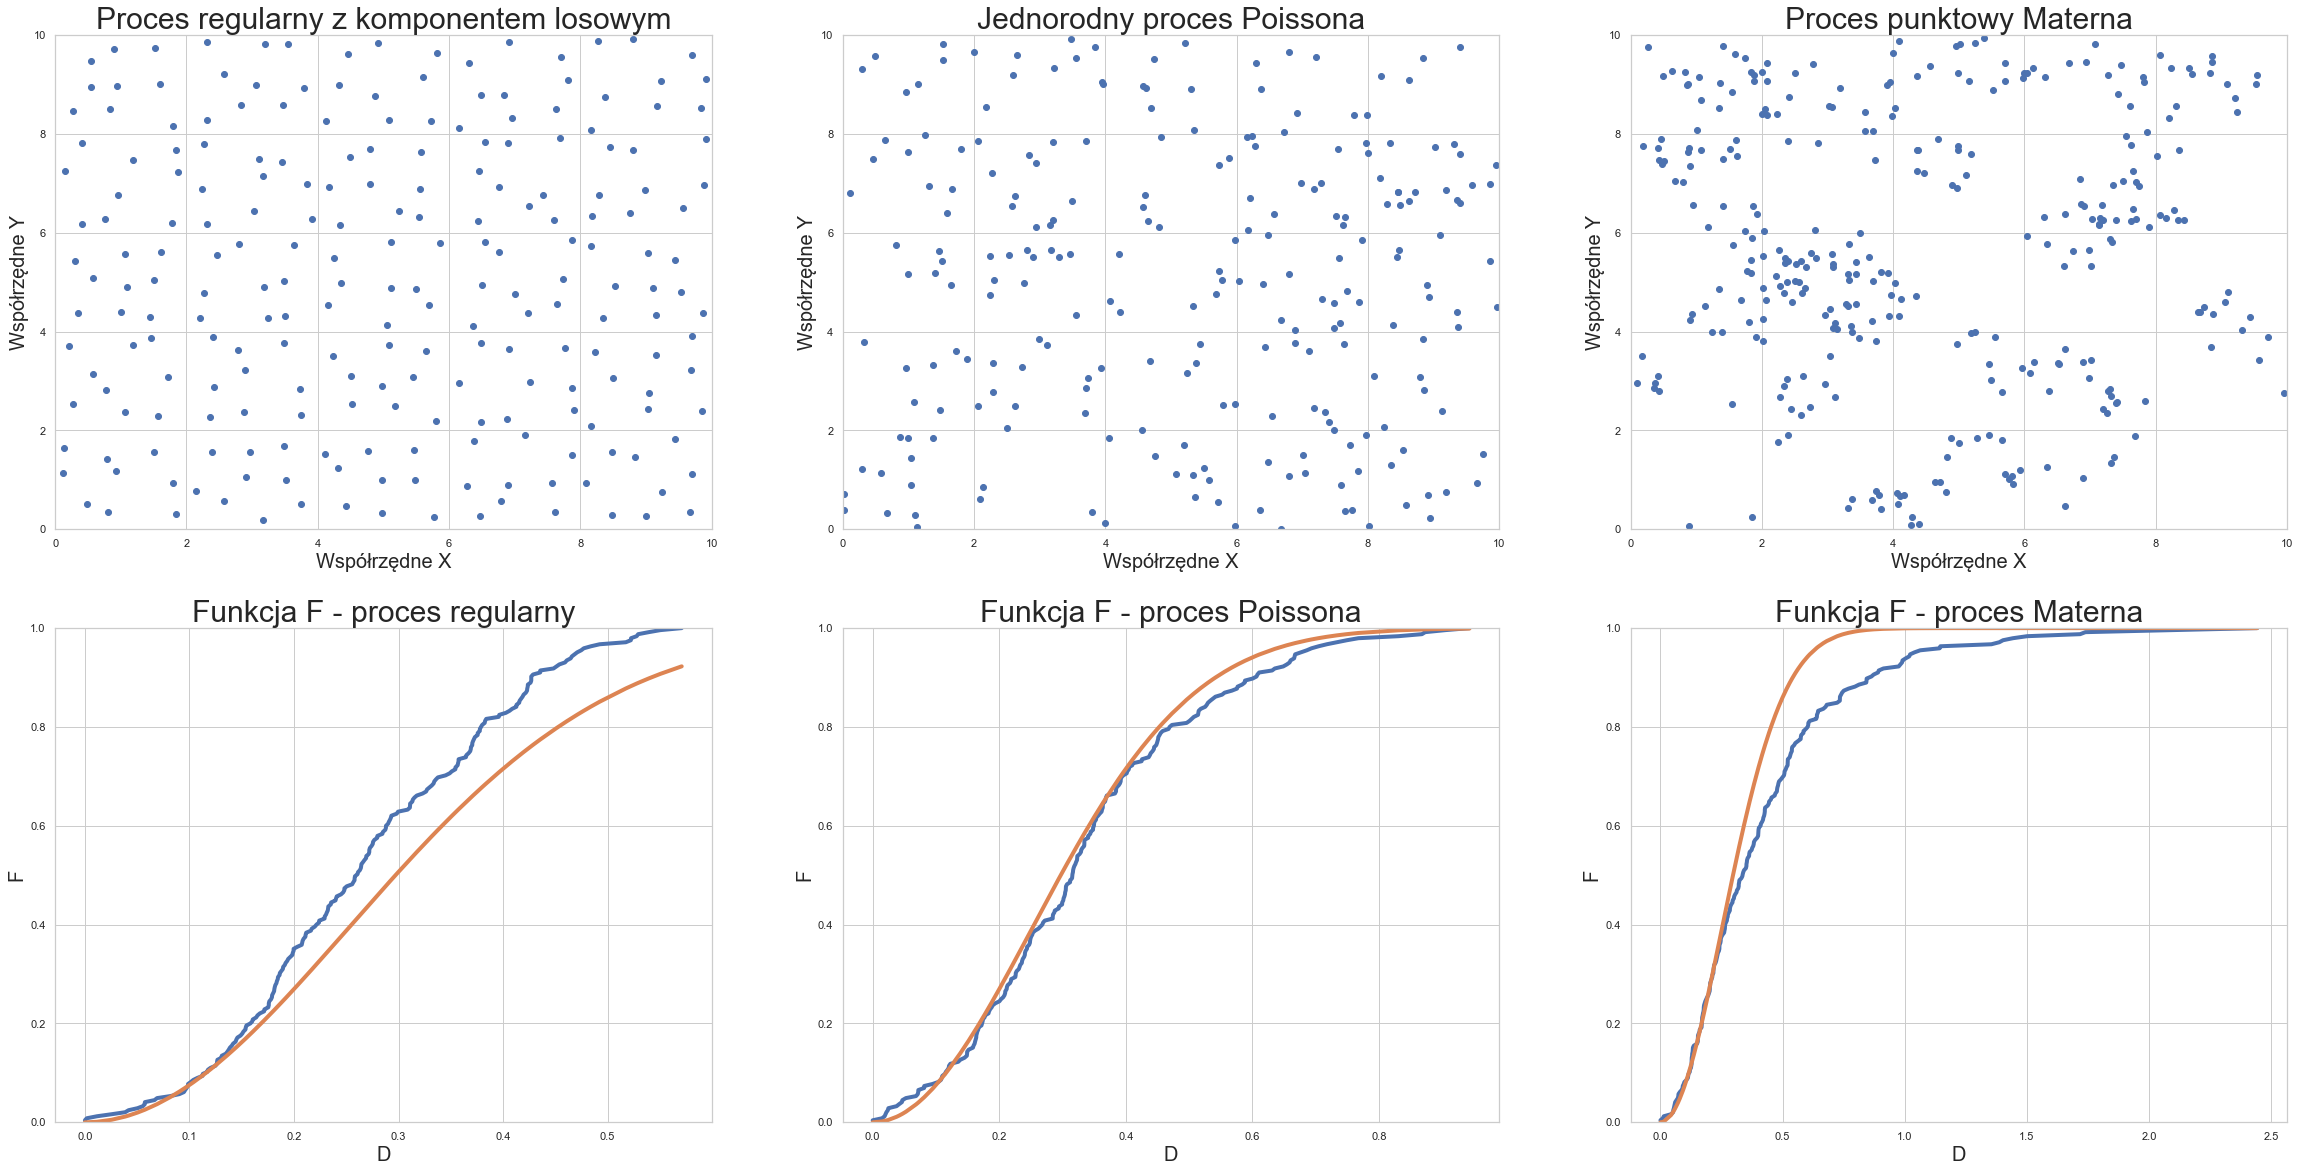

In [11]:
# YOUR CODE HERE
fig, axs=plt.subplots(2, 3, figsize=(40,20))
axs[0,0].scatter(x=rozklad_r["X"], y=rozklad_r["Y"])
axs[0,0].set_title("Proces regularny z komponentem losowym", fontsize=30)
axs[0,0].set_xlabel("Współrzędne X", fontsize=20)
axs[0,0].set_ylabel("Współrzędne Y", fontsize=20)
axs[0,0].set_xlim([0,10])
axs[0,0].set_ylim([0,10])
axs[0,1].scatter(x=rozklad_p["X"], y=rozklad_p["Y"])
axs[0,1].set_title("Jednorodny proces Poissona", fontsize=30)
axs[0,1].set_xlabel("Współrzędne X", fontsize=20)
axs[0,1].set_ylabel("Współrzędne Y", fontsize=20)
axs[0,1].set_xlim([0,10])
axs[0,1].set_ylim([0,10])
axs[0,2].scatter(x=rozklad_m["X"], y=rozklad_m["Y"])
axs[0,2].set_title("Proces punktowy Materna", fontsize=30)
axs[0,2].set_xlabel("Współrzędne X", fontsize=20)
axs[0,2].set_ylabel("Współrzędne Y", fontsize=20)
axs[0,2].set_xlim([0,10])
axs[0,2].set_ylim([0,10])
axs[1,0].plot(f_r["D"], f_r["FD"], linewidth=4)
axs[1,0].plot(fp_r["D"], fp_r["FD"], linewidth=4)
axs[1,0].set_title("Funkcja F - proces regularny", fontsize=30)
axs[1,0].set_xlabel("D", fontsize=20)
axs[1,0].set_ylabel("F", fontsize=20)
axs[1,0].set_ylim([0,1])
axs[1,1].plot(f_p["D"], f_p["FD"], linewidth=4)
axs[1,1].plot(fp_p["D"], fp_p["FD"], linewidth=4)
axs[1,1].set_title("Funkcja F - proces Poissona", fontsize=30)
axs[1,1].set_xlabel("D", fontsize=20)
axs[1,1].set_ylabel("F", fontsize=20)
axs[1,1].set_ylim([0,1])
axs[1,2].plot(f_m["D"], f_m["FD"], linewidth=4)
axs[1,2].plot(fp_m["D"], fp_m["FD"], linewidth=4)
axs[1,2].set_title("Funkcja F - proces Materna", fontsize=30)
axs[1,2].set_xlabel("D", fontsize=20)
axs[1,2].set_ylabel("F", fontsize=20)
axs[1,2].set_ylim([0,1])
plt.show()
#raise NotImplementedError()